In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [219]:
data_path = "../../../../install/real_demo/share/real_demo/data/planner/benchmark/"
file_name = "bench_250_10_2207.npz"
batch_sizes = [250]
data = np.load(data_path+file_name, allow_pickle=True)
data_files = [data]

In [220]:
data_path = "../../../../install/real_demo/share/real_demo/data/planner/benchmark/"
batch_sizes = range(250, 1751, 250)
file_names = list()
for batch_size in batch_sizes:
    file_names.append(f"bench_{batch_size}_10_2207.npz") 

print(file_names)

data_files = list()
for file_name in file_names:
    data = np.load(data_path+file_name, allow_pickle=True)
    data_files.append(data)

['bench_250_10_2207.npz', 'bench_500_10_2207.npz', 'bench_750_10_2207.npz', 'bench_1000_10_2207.npz', 'bench_1250_10_2207.npz', 'bench_1500_10_2207.npz', 'bench_1750_10_2207.npz']


In [67]:
key_list = data.files
print(key_list)

for key in key_list:
    if not key == 'cost_mjx':
        print(f'{key} : {data[key].shape}')

['batch_size', 'horizon', 'total_time', 'step_time', 'success', 'reason', 'target_0', 'theta', 'thetadot', 'cost_mjx', 'cost_g', 'cost_r', 'cost_home']
batch_size : (1,)
horizon : (1,)
total_time : (21,)
step_time : (21,)
success : (21,)
reason : (21,)
target_0 : (21, 7)
theta : (21,)
thetadot : (21,)
cost_g : (21,)
cost_r : (21,)
cost_home : (21,)


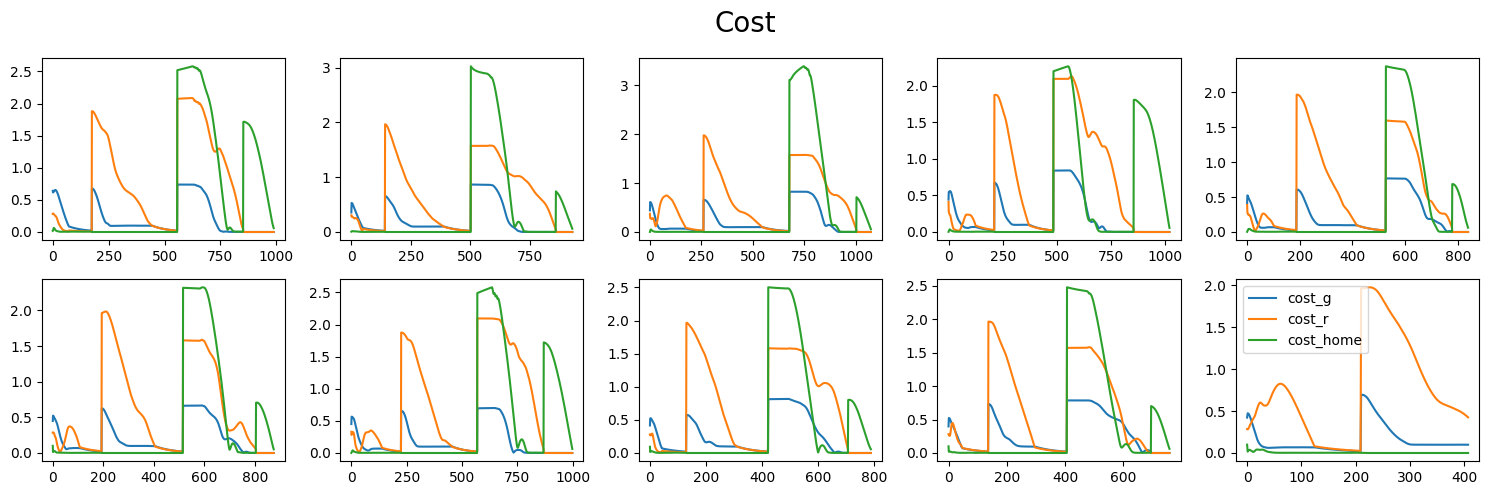

In [69]:
cost_name_list = ['cost_g', 'cost_r', 'cost_home']


fig, axes = plt.subplots(2, 5, figsize=(15, 5))
idx = 1
for i in range(2):
    for j in range(5):
        for cost in cost_name_list:
            axes[i, j].plot(data[cost][idx], label=cost)
        idx+=1

fig.suptitle("Cost", fontsize=20)

plt.tight_layout()  
plt.legend()
plt.show()

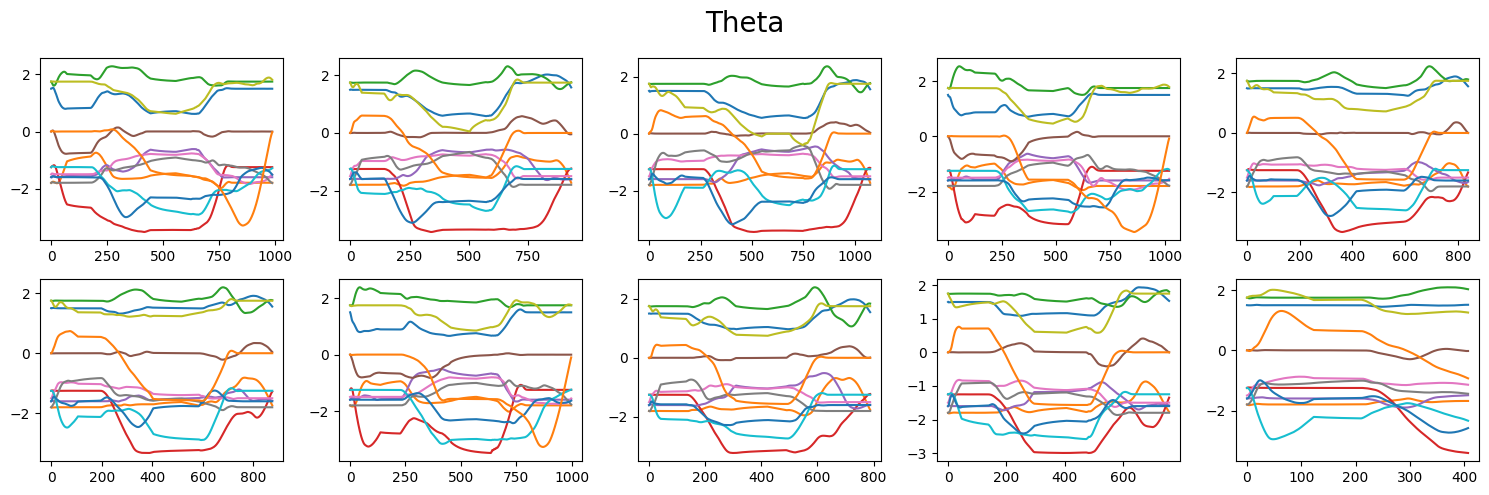

In [70]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
idx = 1
for i in range(2):
    for j in range(5):
        axes[i, j].plot(data['theta'][idx])
        idx+=1

fig.suptitle("Theta", fontsize=20)

plt.tight_layout()  
plt.show()

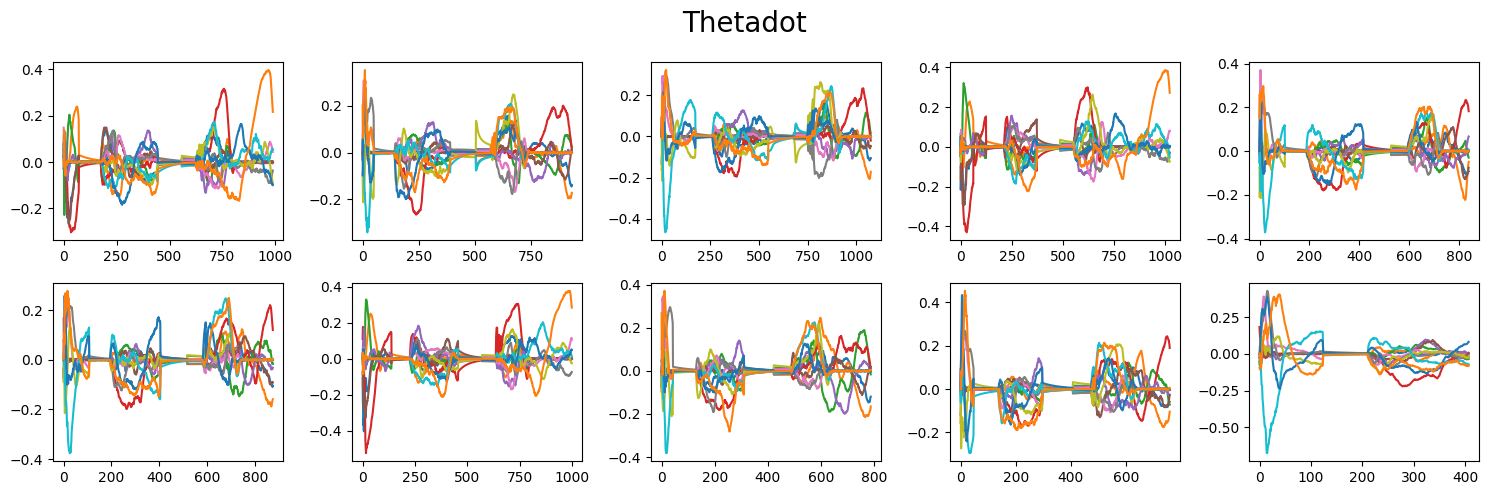

In [72]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
idx = 1
for i in range(2):
    for j in range(5):
        axes[i, j].plot(data['thetadot'][idx])
        idx+=1

fig.suptitle("Thetadot", fontsize=20)

plt.tight_layout()  
plt.show()

16 ['na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'collision' 'na' 'collision'
 'na' 'na' 'timeout' 'collision' 'na' 'na' 'na' 'na']
18 ['na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'collision'
 'collision' 'na' 'na' 'na' 'na' 'na' 'na' 'na']
14 ['na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'timeout' 'timeout' 'collision'
 'na' 'collision' 'na' 'na' 'na' 'na' 'collision' 'collision' 'na']
15 ['collision' 'na' 'na' 'na' 'na' 'na' 'collision' 'na' 'collision' 'na'
 'collision' 'na' 'na' 'collision' 'na' 'na' 'na' 'na' 'na' 'na']
17 ['na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'collision' 'collision'
 'na' 'na' 'na' 'na' 'collision' 'na' 'na' 'na']
17 ['na' 'na' 'na' 'na' 'na' 'na' 'collision' 'na' 'na' 'collision' 'na'
 'collision' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'na']
19 ['na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'na' 'na'
 'na' 'na' 'na' 'na' 'collision' 'na']
[80, 90, 70, 75, 85, 85, 95]


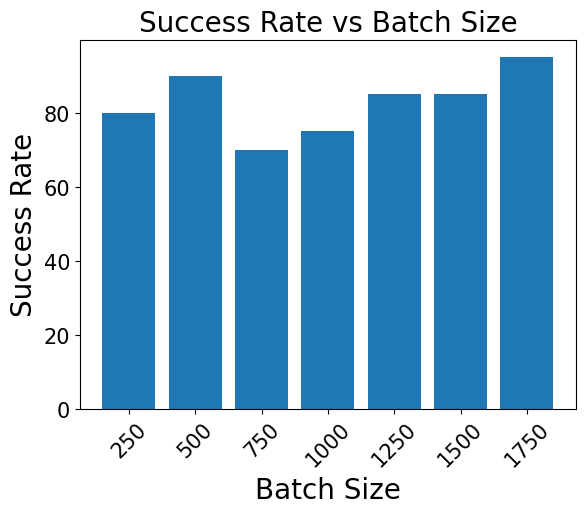

In [221]:
success_rate = list()
for data in data_files:
    success = data['success'][1:]
    print(sum(success), data['reason'][1:])
    success_rate.append(int(sum(success)/len(success)*100))

print(success_rate)

f_s = 20
plt.xlabel("Batch Size", fontsize=f_s)
plt.ylabel("Success Rate", fontsize=f_s)
plt.title("Success Rate vs Batch Size", fontsize=f_s)
plt.tick_params(axis='both', labelsize=15)   # Tick labels font size
plt.xticks(batch_sizes)
plt.xticks(rotation=45)
plt.bar(batch_sizes, success_rate, width=200)
plt.show()

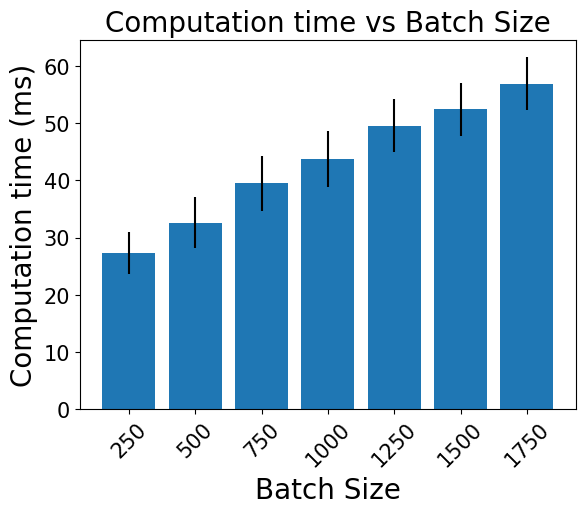

In [222]:
comp_time_mean = list()
comp_time_std = list()

for data in data_files:
    comp_time = np.concatenate(data['step_time'][1:])
    comp_time_mean.append(np.mean(comp_time[1:]))
    comp_time_std.append(np.std(comp_time[1:]))




plt.xlabel("Batch Size", fontsize=f_s)
plt.ylabel("Computation time (ms)", fontsize=f_s)
plt.title("Computation time vs Batch Size", fontsize=f_s)
plt.tick_params(axis='both', labelsize=15)   # Tick labels font size
plt.xticks(batch_sizes)
plt.xticks(rotation=45)
plt.bar(batch_sizes, comp_time_mean, yerr=comp_time_std, width=200)
plt.show()

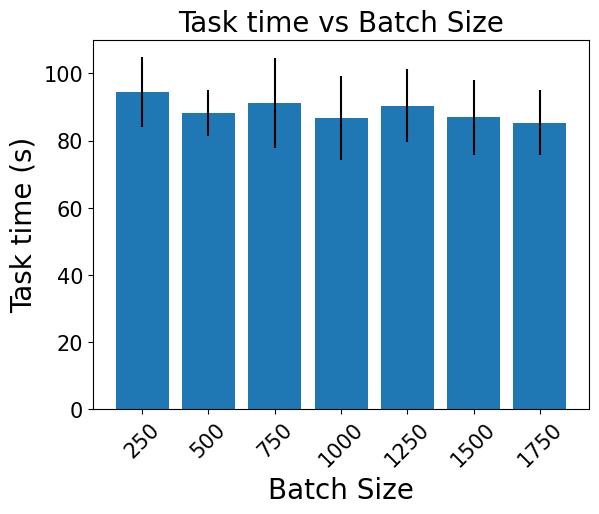

In [224]:
total_time_mean = list()
total_time_std = list()

for data in data_files:
    success = np.array(data['success'][1:], dtype=bool)
    comp_time = np.array(data['total_time'][1:])[success]
    total_time_mean.append(np.mean(comp_time))
    total_time_std.append(np.std(comp_time))

plt.xlabel("Batch Size", fontsize=f_s)
plt.ylabel("Task time (s)", fontsize=f_s)
plt.title("Task time vs Batch Size", fontsize=f_s)
plt.tick_params(axis='both', labelsize=15)   # Tick labels font size
plt.xticks(batch_sizes)
plt.xticks(rotation=45)
plt.bar(batch_sizes, total_time_mean, yerr=total_time_std, width=200)
plt.show()